In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.layers import Dense,Flatten, Conv2D, merge
from keras.layers import MaxPooling2D, Dropout, Input
from keras.utils import np_utils, print_summary, plot_model
import tensorflow as tf
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint
import pickle
from keras.callbacks import TensorBoard
import keras
from keras.layers.core import Reshape
from keras.layers.merge import concatenate

Using TensorFlow backend.


In [2]:
def loadFromPickle(path):
    with open(path + "features", "rb") as f:
        features = np.array(pickle.load(f))
    with open(path + "labels", "rb") as f:
        labels = np.array(pickle.load(f))

    return features, labels

In [3]:
def augmentData(features, labels):
    features = np.append(features, features[:, :, ::-1], axis=0)
    labels = np.append(labels, -labels, axis=0)
    return features, labels

In [4]:
def prepress_labels(labels):
    labels = np_utils.to_categorical(labels)
    return labels

In [5]:
import matplotlib.pyplot as plt
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

In [6]:
ip = Input(shape=(28,28,1))

In [7]:
c5 = Conv2D(64, (5, 5), activation='relu')(ip)
c5 = Flatten()(c5)

In [8]:
c3 = Conv2D(64, (3, 3), activation='relu')(ip)
c3 = Flatten()(c3)

In [9]:
c1 = Conv2D(64, (1, 1), activation='relu')(ip)
c1 = Flatten()(c1)

In [10]:
concatenated = concatenate([c1, c3, c5])
out = Dense(4096, activation='relu')(concatenated)
d1 = Dense(2048, activation='relu')(out)
d2 = Dropout(0.6)(d1)
d3 = Dense(1024, activation='relu')(d2)
d4 = Dropout(0.6)(d3)
d5 = Dense(512, activation='relu')(d4)
d6 = Dropout(0.6)(d5)
d7 = Dense(128, activation='relu')(d6)
d8 = Dropout(0.6)(d7)
d9 = Dense(40, activation='softmax')(d8)
model = Model(inputs=ip, outputs=d9)

In [11]:
plot_model(model,to_file='demo.png',show_shapes=True)

In [12]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 26, 26, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 24, 24, 64)   1664        input_1[0][0]                    
__________________________________________________________________________________________________
max_poolin

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
filepath = "cnn_multi.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [14]:
path = 'I:/Deep Learning/DeepProject/'
features, labels = loadFromPickle(path + 'DataSet/CNN_DataSet/')
features, labels = shuffle(features, labels)
labels=prepress_labels(labels)
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0, test_size=0.1)
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

In [15]:
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y), 
                    epochs=10, 
                    batch_size=64, 
                    shuffle=True, 
                    callbacks=[TensorBoard(log_dir="CNN_Multi")])

Train on 450000 samples, validate on 50000 samples
Epoch 1/10
450000/450000 [==============================] - 357s 794us/step - loss: 0.4660 - acc: 0.8655 - val_loss: 0.3273 - val_acc: 0.9009
Epoch 2/10
450000/450000 [==============================] - 359s 798us/step - loss: 0.3166 - acc: 0.9081 - val_loss: 0.3255 - val_acc: 0.9047
Epoch 3/10
450000/450000 [==============================] - 359s 799us/step - loss: 0.2578 - acc: 0.9224 - val_loss: 0.3342 - val_acc: 0.9028
Epoch 4/10
450000/450000 [==============================] - 361s 802us/step - loss: 0.2144 - acc: 0.9344 - val_loss: 0.3552 - val_acc: 0.9004
Epoch 5/10
450000/450000 [==============================] - 362s 805us/step - loss: 0.1791 - acc: 0.9440 - val_loss: 0.3736 - val_acc: 0.9023
Epoch 6/10
450000/450000 [==============================] - 363s 806us/step - loss: 0.1542 - acc: 0.9521 - val_loss: 0.4455 - val_acc: 0.8999
Epoch 7/10
450000/450000 [==============================] - 363s 808us/step - loss: 0.1329 - acc:

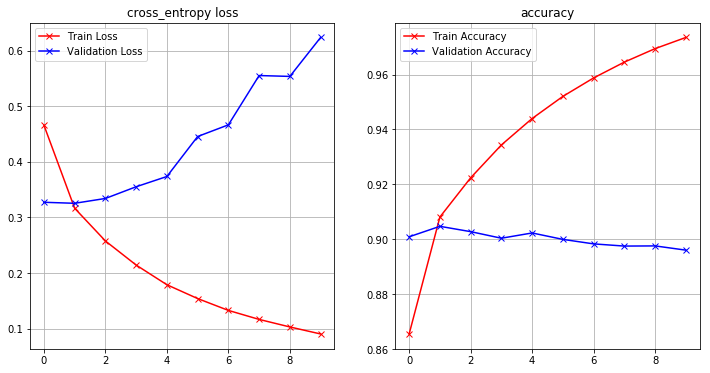

In [16]:
plot_loss_accuracy(history)